# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Pandas 출력 최대치 설정, 열41개, 행 20개
pd.set_option('max_columns', 41,'max_rows', 20) 

In [3]:
df = pd.read_csv('Auction_master_train.csv')

In [4]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [5]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

### 데이터 설명

    Auction_key           아파트경매 고유키값

    Auction_class         경매구분  

**강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행


    Bid_class              입찰구분(일반/개별/일괄)
    Claim_price            경매 신청인의 청구 금액
    Appraisal_company      감정사 
    Appraisal_date         감정일자
    Auction_count          총경매 횟수

    Auction_miscarriage_count      총유찰횟수 (무효로 돌아가는 일)
    Total_land_gross_area          총토지전체 면적
    Total_land_real_area           총토지실면적
    Total_land_auction_area        총토지경매면적
    Total_building_area            총건물면적
    Total_building_auction_area    총건물경매면적
    Total_appraisal_price          총감정가

    Minimun_sales_price      최저매각가격 
                        : 입찰 시 입찰인이 최저로 제시해야만 하는 금액

    First_auction_date      최초경매일
    Final_auction_date      최종경매일
    Final_result            최종결과

    Creditor           채권자, 경매신청인
    Apartment_usage    건물의 대표용도
    Completion_date    준공일
    Total_floor        총층수
    Current_floor      현재층수

    Close_date     종국일자
    Close_result   종국결과

    종국결과, 낙찰과 배당의 차이 :  경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.


In [6]:
# 유일한 값 찾기 (각 열의 값들이 몇개의 class 들로 이루어져 있는지 보기 위함.)
df.nunique()

Auction_key                  1933
Auction_class                   2
Bid_class                       3
Claim_price                  1488
Appraisal_company             238
Appraisal_date                712
Auction_count                  11
Auction_miscarriage_count       9
Total_land_gross_area        1378
Total_land_real_area         1485
                             ... 
Specific                       55
Share_auction_YorN              2
road_name                    1038
road_bunji1                   363
road_bunji2                    36
Close_date                    389
Close_result                    2
point.y                      1416
point.x                      1417
Hammer_price                 1846
Length: 41, dtype: int64

In [7]:
# 데이터 요약통계
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


# 2. 결측치확인 및 제거

In [8]:
#결측치 있는 열 확인 (덧셈은 행들의 값을 더해야하니까 axis=0)
df.isnull().sum(axis=0)

Auction_key                     0
Auction_class                   0
Bid_class                       0
Claim_price                     0
Appraisal_company               0
Appraisal_date                  0
Auction_count                   0
Auction_miscarriage_count       0
Total_land_gross_area           0
Total_land_real_area            0
                             ... 
Specific                     1869
Share_auction_YorN              0
road_name                       0
road_bunji1                    24
road_bunji2                  1778
Close_date                      0
Close_result                    0
point.y                         0
point.x                         0
Hammer_price                    0
Length: 41, dtype: int64

In [9]:
# 결측값이 있는 모든 열을 제거 
# 결측치가 제거된 데이터를 df_delete에 집어넣음.
df_delete = df.dropna(axis=1)

In [10]:
#격측값이 있는 열이 다 제거된 것을 볼수 있음.
df_delete.isnull().sum(axis=0)

Auction_key                  0
Auction_class                0
Bid_class                    0
Claim_price                  0
Appraisal_company            0
Appraisal_date               0
Auction_count                0
Auction_miscarriage_count    0
Total_land_gross_area        0
Total_land_real_area         0
                            ..
Preserve_regist_date         0
Total_floor                  0
Current_floor                0
Share_auction_YorN           0
road_name                    0
Close_date                   0
Close_result                 0
point.y                      0
point.x                      0
Hammer_price                 0
Length: 35, dtype: int64

# 3.Visualization 
- heatmap
- histogram
- subplot

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맑은 고딕을 사용하겠습니다 !
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) #그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

In [13]:
#결측치가 제거된 데이터를 확인하기.
df_delete.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


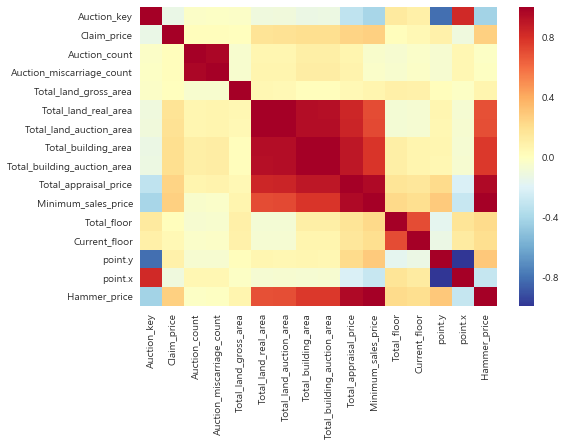

In [14]:
# 모든 연속형 변수 간의 상관관계를 Heatmap 을 통해 확인하기 
sns.heatmap(df_delete.corr(),cmap='RdYlBu_r')  
plt.show()

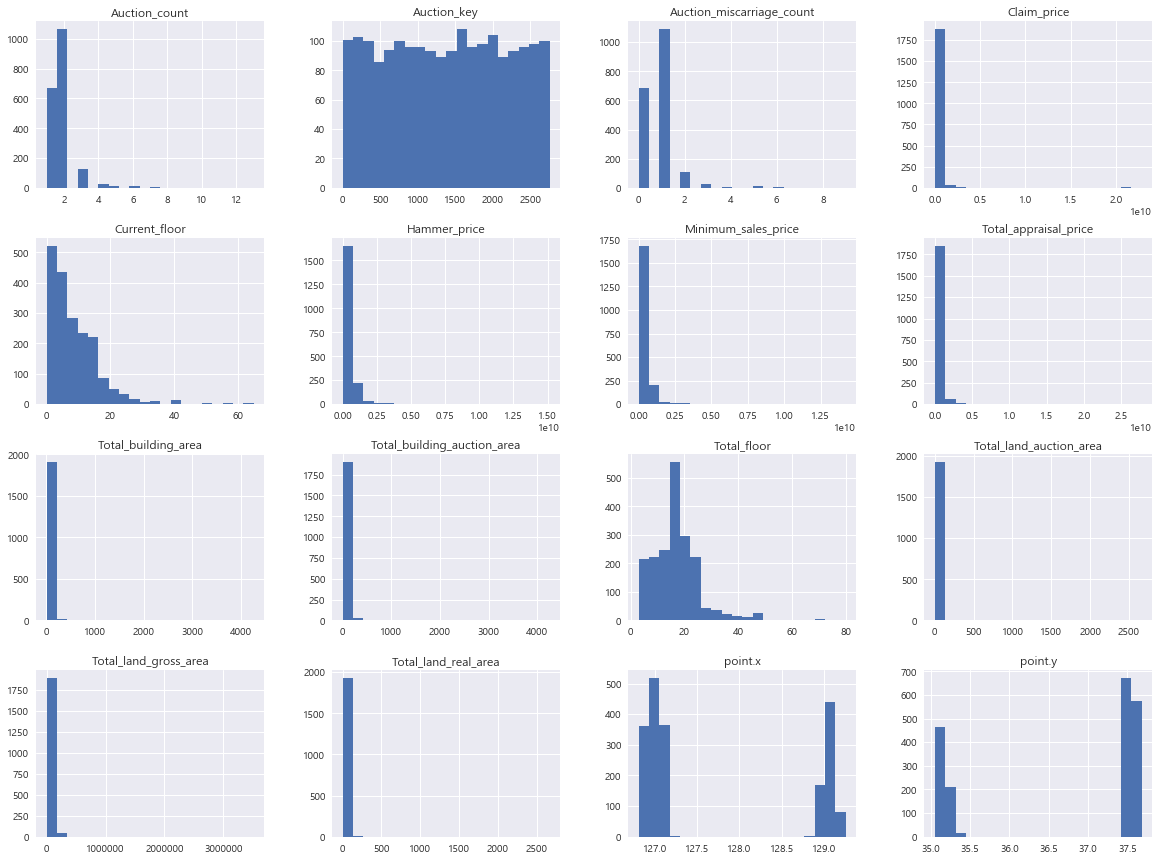

In [15]:
# 모든 연속형 변수에 대한 히스토그램 한꺼번에 그리기
df_delete.hist(bins=20, figsize=(20,15))    #bin 에 따라 막대의 굵기가 달라지넹 , fig_size에 따라 그래프의 크기가 달라짐.
plt.show()

# 4. subplot

In [16]:
# Appraisal_company 가 가지는 값들에는 무엇이 있을까
# 어떤 회사가 감정을 했느냐에 따라 Hammer price 값에 영향을 미치지 않을까? 
df_delete["Appraisal_company"].value_counts()

자연감정      33
부경감정      33
서초감정      31
한마음감정     30
삼창감정      30
대일감정      30
프라임감정     28
대한감정      28
삼일감정      26
미르감정      23
          ..
에프엠지감정     1
올감정        1
세라감정       1
TNB감정      1
서현감정       1
이근태감정      1
남강감정       1
고기옥감정      1
경서감정       1
정용규감정      1
Name: Appraisal_company, Length: 238, dtype: int64

In [17]:
df_delete["Auction_class"].value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

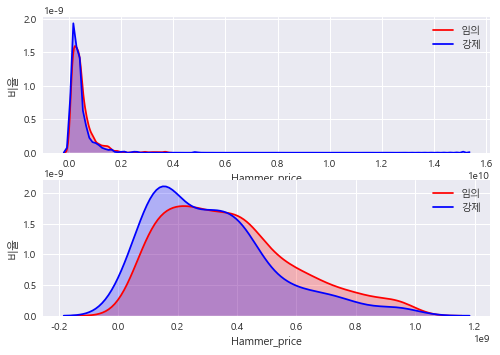

In [18]:
#1번
# 경매 구분값(Auction_class) 에 따라 낙찰가격이 영향을 미칠지 보기위힘.
# 강제의 Hammer price 가 조금더 낮은것을 볼수 있다. 
# 
f,ax = plt.subplots(2,1)
ax = ax.flatten()

ax[0] = plt.subplot(2,1,1)
ax[0] = sns.kdeplot(df_delete.query('Auction_class == "임의"')['Hammer_price'], color = "red",shade= True)
ax[0] = sns.kdeplot(df_delete.query('Auction_class == "강제"')['Hammer_price'], color = 'blue', shade = True)
ax[0].set_xlabel('Hammer_price')
ax[0].set_ylabel('비율')
ax[0] = ax[0].legend(['임의','강제'])

#2번
# 1번 그래프를 좀더 확대해서 보기위해 Hammer_pirce 값의 범위를 조정했다.
ax[1] = plt.subplot(2,1,2)
df_d = df_delete.query('Hammer_price<1000000000')
ax[1] = sns.kdeplot(df_d.query('Auction_class == "임의"')['Hammer_price'], color = "red",shade= True)
ax[1] = sns.kdeplot(df_d.query('Auction_class == "강제"')['Hammer_price'], color = 'blue', shade = True)
ax[1].set_xlabel('Hammer_price')
ax[1].set_ylabel('비율')
ax[1] = ax[1].legend(['임의','강제'])

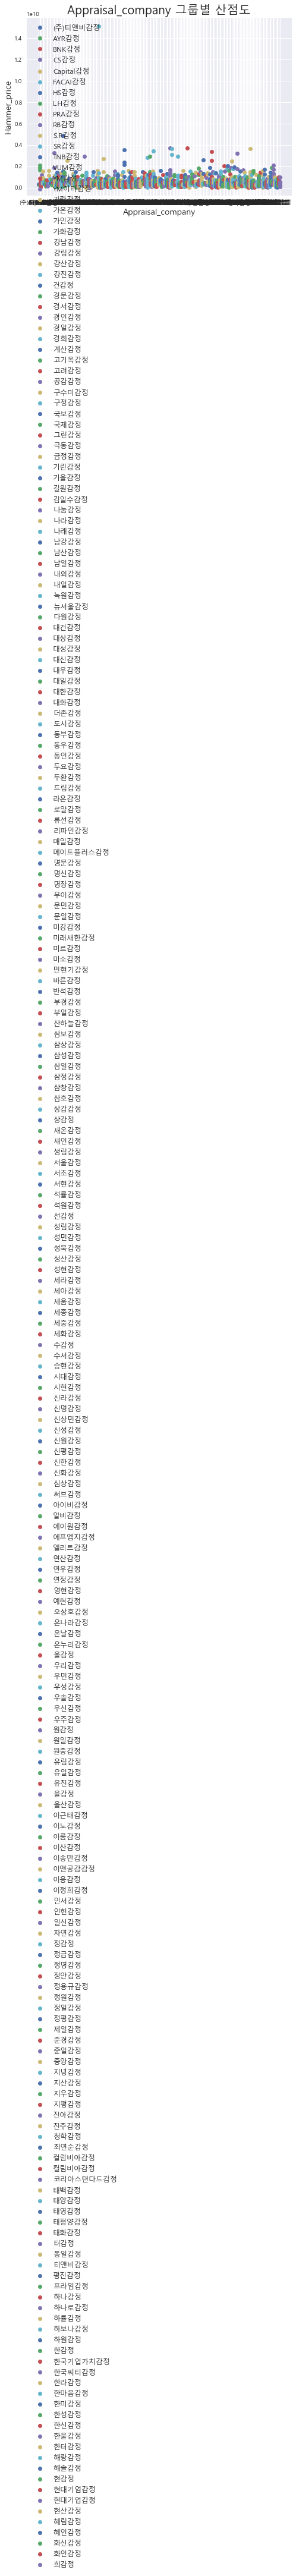

In [19]:
# 3번
# 그룹별 산점도 그리기
# 어떤 회사가 감정을 했느냐에 따라 Hammer price 값에 영향을 미치지 않을까? 

groups = df_delete.groupby('Appraisal_company')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Appraisal_company, 
            group.Hammer_price, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Appraisal_company 그룹별 산점도', fontsize=20)
plt.xlabel('Appraisal_company', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

In [20]:
# 3번의 결과를 너무 알아보기 어려워서 20번 이상 등장한 회사만 확인해보자.
df_d2 = df_delete["Appraisal_company"].value_counts()>20
df_d2.head(20)

자연감정      True
부경감정      True
서초감정      True
한마음감정     True
삼창감정      True
대일감정      True
프라임감정     True
대한감정      True
삼일감정      True
미르감정      True
한라감정      True
통일감정      True
대화감정      True
오상호감정     True
한신감정     False
생림감정     False
문일감정     False
내외감정     False
명장감정     False
평진감정     False
Name: Appraisal_company, dtype: bool

In [21]:
df_d2 = df_delete[(df_delete['Appraisal_company']== '자연감정')
                 |(df_delete['Appraisal_company']== '부경감정')
                 |(df_delete['Appraisal_company']== '서초감정')
                 |(df_delete['Appraisal_company']== '대일감정')
                 |(df_delete['Appraisal_company']== '한마음감정')
                 |(df_delete['Appraisal_company']== '삼창감정')
                 |(df_delete['Appraisal_company']== '대한감정')
                 |(df_delete['Appraisal_company']== '프라임감정')
                 |(df_delete['Appraisal_company']== '삼일감정')
                 |(df_delete['Appraisal_company']== '미르감정')
                 |(df_delete['Appraisal_company']== '한라감정')
                 |(df_delete['Appraisal_company']== '오상호감정')
                 |(df_delete['Appraisal_company']== '통일감정')
                 |(df_delete['Appraisal_company']== '대화감정')]


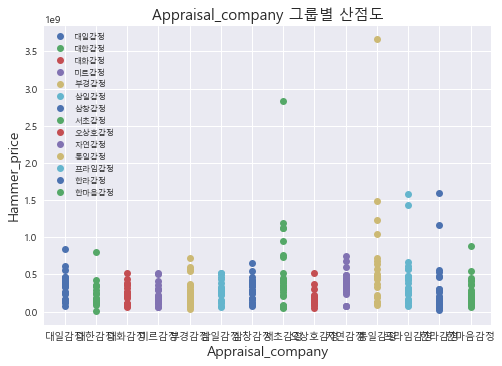

In [22]:
# 3번
# 그룹별 산점도 그리기 상위 14개 ver
# 어떤 회사가 감정을 했느냐에 따라 Hammer price 값에 영향을 미치지 않을까? 

groups = df_d2.groupby('Appraisal_company')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Appraisal_company, 
            group.Hammer_price, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper left') # legend position
plt.title('Appraisal_company 그룹별 산점도', fontsize=15)
plt.xlabel('Appraisal_company', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

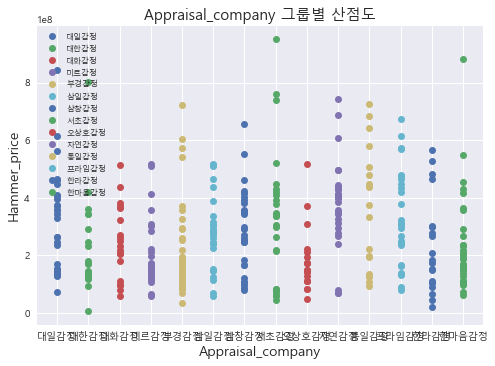

In [23]:
# 3번
# 그룹별 산점도 그리기 상위 14개 ver
# 어떤 회사가 감정을 했느냐에 따라 Hammer price 값에 영향을 미치지 않을까? 
# Hammer_price<1000000000 인 version

df_d2 = df_d2.query('Hammer_price<1000000000')
groups = df_d2.groupby('Appraisal_company')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Appraisal_company, 
            group.Hammer_price, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper left') # legend position
plt.title('Appraisal_company 그룹별 산점도', fontsize=15)
plt.xlabel('Appraisal_company', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

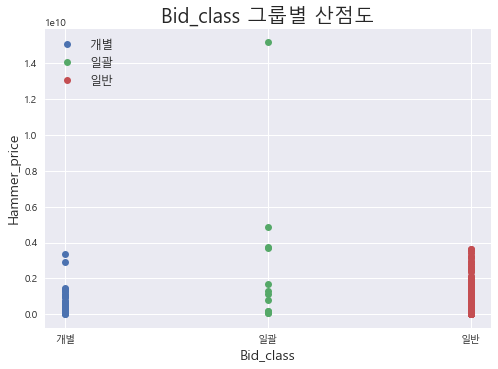

In [24]:
# Bid class 그룹별 산점도 그리기
# Bid class 별로 hammer class에 미치는 영향이 있을까?

groups = df_delete.groupby('Bid_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Bid_class, 
            group.Hammer_price, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Bid_class 그룹별 산점도', fontsize=20)
plt.xlabel('Bid_class', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

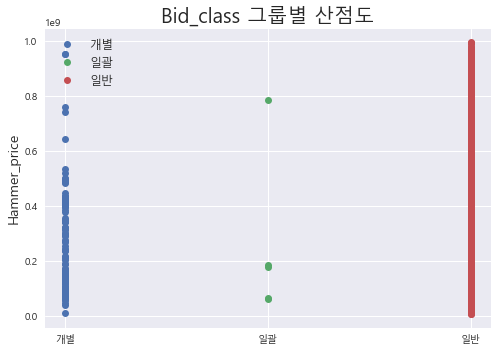

In [25]:
# 이상치가 있는것을 확인할수 있다. 범위를 조정해서 plot을 다시 그려보기로 한다.!
# plot 을 그려보니...  그룹별로 데이터량의 차이가 너무 큰것같다. 일괄은 너무 적다.
# 이 그래프로 유의미한 결과를 도출하기 어려운것같다. 

df_delete = df_delete.query('Hammer_price<1000000000')
groups = df_delete.groupby('Bid_class')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.Bid_class, 
            group.Hammer_price, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Bid_class 그룹별 산점도', fontsize=20)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

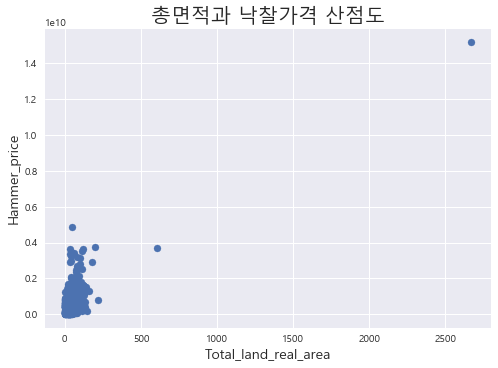

In [26]:
# 총면적과 낙찰가격은 서로 깊은 관계가 있을거같다.

plt.scatter(x=df['Total_land_real_area'],y=df['Hammer_price'])
plt.title('총면적과 낙찰가격 산점도', fontsize=20)
plt.xlabel('Total_land_real_area', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)

plt.show()

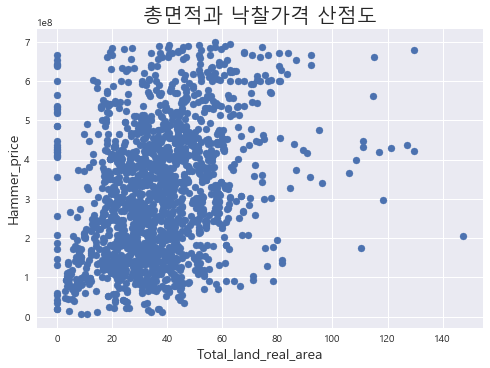

In [27]:
# hammer_price의 범위를 조정해서 산점도를 더 예쁘게 그렸다!            
df_delete = df_delete.query('Hammer_price<700000000')
plt.scatter(x=df_delete['Total_land_real_area'],y=df_delete['Hammer_price'])
plt.title('총면적과 낙찰가격 산점도', fontsize=20)
plt.xlabel('Total_land_real_area', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)
plt.show()

Text(14.549999999999997, 0.5, 'Hammer_price')

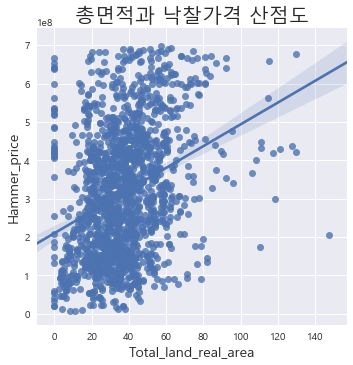

In [28]:
#산포도에 직선을 그어 추세선을 확인해보았다.

sns.lmplot(x='Total_land_real_area',y='Hammer_price',data=df_delete)
plt.title('총면적과 낙찰가격 산점도', fontsize=20)
plt.xlabel('Total_land_real_area', fontsize=14)
plt.ylabel('Hammer_price', fontsize=14)

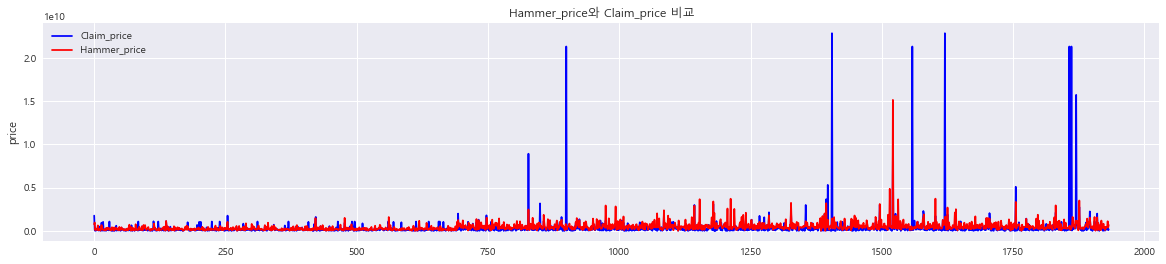

In [29]:
# 주장한 금액과 낙찰금액은 비슷할것이다. 
# 
plt.rcParams["figure.figsize"] = (20,4) # 이걸 통해서 그래프를 넓게 펼쳐준다.

plt.plot(df['Claim_price'],'b') # df의 custid 열을 line chart로 시각화 하는 코드
plt.plot(df['Hammer_price'],'r' )

plt.legend(['Claim_price','Hammer_price'])
plt.title('Hammer_price와 Claim_price 비교')
plt.xlabel('') # x 축의 레이블 지정
plt.ylabel('price') # y 축의 레이블 지정
plt.show()

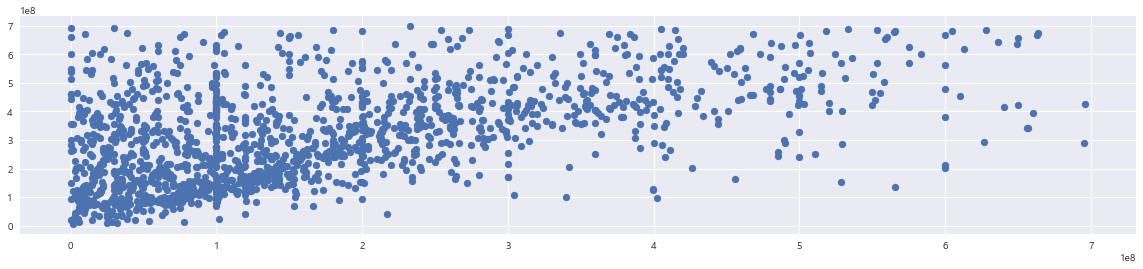

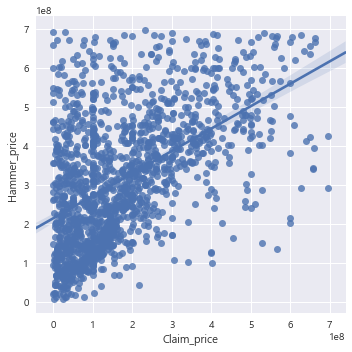

In [30]:
# Claim_price 와 Hammer_price 사이에는 상관관계가 있는것으로 생각된다. 
df_delete2 = df_delete.query('Claim_price<700000000')
plt.scatter(x=df_delete2['Claim_price'],y=df_delete2['Hammer_price'])

sns.lmplot(x='Claim_price',y='Hammer_price',data=df_delete2)

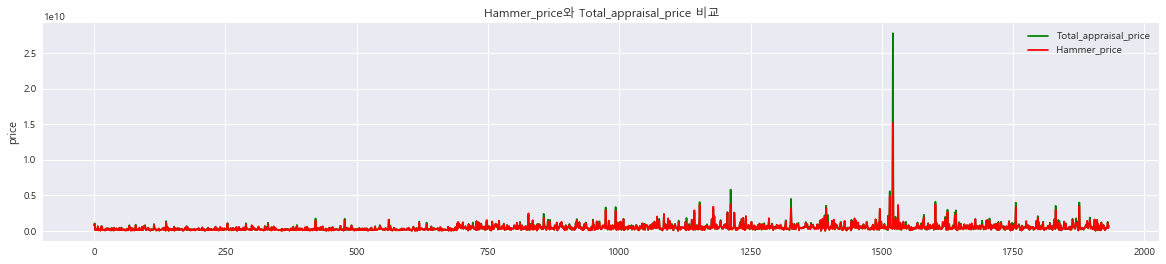

In [31]:
# Total_appraisal_price 총감정가와 결정 가격이 비슷하게 따라가는것을 볼수 있다. 

plt.plot(df['Total_appraisal_price'],'g')
plt.plot(df['Hammer_price'],'r')

plt.legend(['Total_appraisal_price','Hammer_price'])
plt.title('Hammer_price와 Total_appraisal_price 비교')
plt.xlabel('') # x 축의 레이블 지정
plt.ylabel('price') # y 축의 레이블 지정
plt.show()


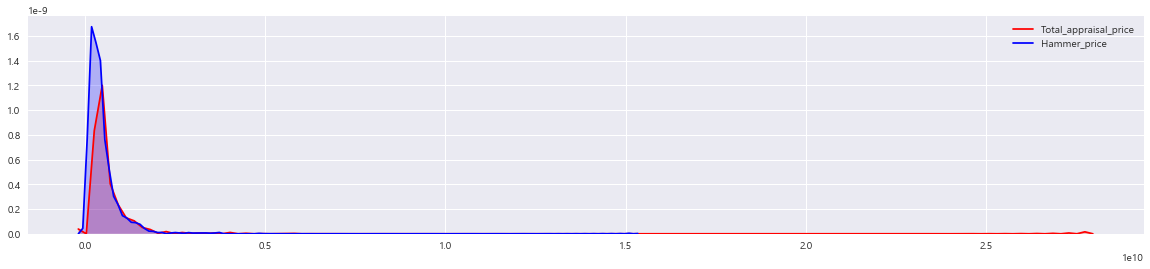

In [32]:
# 두 그래프가 너무 겹쳐서 시각화를 다른 방식으로 해보자

sns.kdeplot(df.Total_appraisal_price, color = "red",shade= True)
sns.kdeplot(df.Hammer_price, color = 'blue', shade = True)
plt.show()

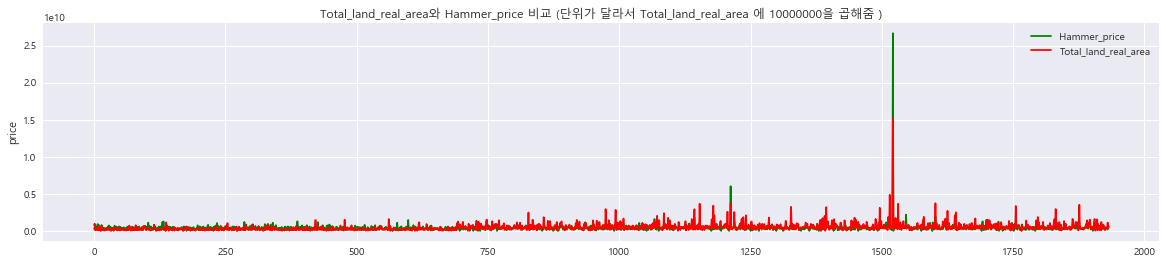

In [33]:
# Total 면적과 hammer price는 비슷할것이다. 

plt.plot(df['Total_land_real_area']*10000000,'g')
plt.plot(df['Hammer_price'],'r')

plt.legend(['Hammer_price','Total_land_real_area'])
plt.title('Total_land_real_area와 Hammer_price 비교 (단위가 달라서 Total_land_real_area 에 10000000을 곱해줌 )')
plt.xlabel('') # x 축의 레이블 지정
plt.ylabel('price') # y 축의 레이블 지정
plt.show()



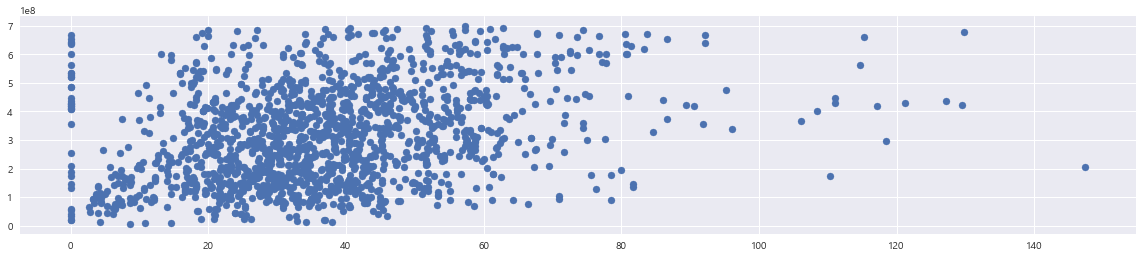

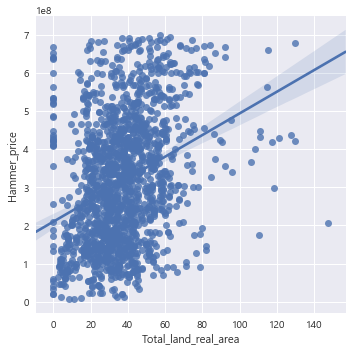

In [34]:
# 이것역시 깊은 상관관계가 있음을 알수 있다. 
plt.scatter(x=df_delete['Total_land_real_area'],y=df_delete['Hammer_price'])
sns.lmplot(x='Total_land_real_area',y='Hammer_price',data=df_delete)

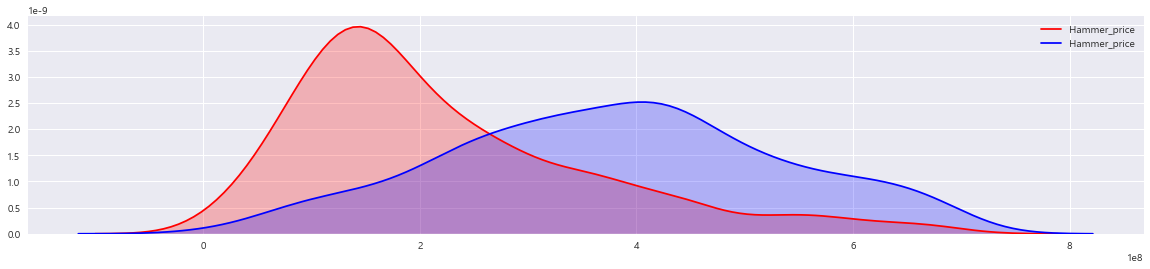

In [35]:
# 부산보다 서울의 Hammer_price가 대체로 더 높게 분포하고 있음을 알수 있다.
sns.kdeplot(df_delete.query('addr_do == "부산"')['Hammer_price'], color = "red",shade= True)
sns.kdeplot(df_delete.query('addr_do == "서울"')['Hammer_price'], color = 'blue', shade = True)

plt.show()

In [36]:
df_delete.addr_si.nunique()

39

# 5. 유의미한 Feature 생성

###  1. 시각 First_auction_date , Final_auction_date  
###  2. Final_auction_date 의 연도 추출
###  3. Final_auction_date 의 월 추출
###  4. Final_auction_date 의 요일 추출
###  5. 판정가(Total_appraisal_price) 와 hammer_price 의 차이
###  6. 판정가와 hammer_price 를 기반으로 이익이면 1, 손해면 0
###  7. 전체 건물 층수에 비해 높은 층에 속하는지 비율
###  8.  Total_land_gross_area , Total_land_real_area , Total_building_area 의 평균을 구해보자 
###  9.  배당여부를 보기 편하게 바꾸자!
###  10.Auction_class 를 보기 편하게 바꾸자!

In [37]:
# 최종경매일과 최초 경매일 일수의 차이를 보고싶었다
# 일수가 높다는것은 잘 안팔렸다는것이 아닐까!

df['date'] = pd.to_datetime(df.Final_auction_date)-pd.to_datetime(df.First_auction_date)
df.date = df.date.apply(lambda x: int(str(x).split(' ')[0]))

In [38]:
# 연도를 추출해보자.
# 연도별로 어떤 경향을 보일수도 있을거라 생각했다.

df['year'] = pd.DatetimeIndex(df['Final_auction_date']).year

In [39]:
# month 를 출력해보자
# 마찬가지로 종료된 달을 뽑아내어 특정달이 영향을 미치는지 궁금했다. 

df['month']=pd.DatetimeIndex(df['Final_auction_date']).month

In [40]:
# 요일을 추출해보자
df['day-of-week']=pd.DatetimeIndex(df['Final_auction_date']).weekday_name

In [41]:
# 판정가(Total_appraisal_price) 와 hammer_price 의 차이
# 감정가격보다 얼마나 더 이득을 얻었는지
df['Gain']= df['Total_appraisal_price']-df['Hammer_price']

In [42]:
# 이득의 정도를 + 면 1 - 면 0으로 나타내보자.

def transform_to_number(x):
    if x > 0:
        return 1
    else:
        return 0
    
df['gain_or_loss'] = df['Gain'].apply(transform_to_number)

In [43]:
# 전체 건물 층수에 비해 높은 층에 속하는지 비율

df['floor_percentage'] = df['Current_floor']/df['Total_floor']


In [44]:
# Total_land_gross_area , Total_land_real_area , Total_building_area 의 평균을 구해보자 
# 면적들의 평균은 hammer price와 연관이 있을것이다.

df['average_land']=(df['Total_land_gross_area']+df['Total_land_real_area']+df['Total_building_area'])/3

In [45]:
# 배당 여부를 보기 편하게 바꾸자! + Auction Class도 바꾸자!

def transform(x):
    if x == '배당':
        return 1
    else:
        return 0

def transform1(x):
    if x == '임의':
        return 1
    else:
        return 0
    
df['Close_result_num'] = df['Close_result'].apply(transform)
df['Auction_class_num'] = df['Auction_class'].apply(transform1)

In [46]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,date,year,month,day-of-week,Gain,gain_or_loss,floor_percentage,average_land,Close_result_num,Auction_class_num
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000,35,2018,3,Tuesday,76000000,1,0.111111,4270.373333,1,1
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999,35,2017,2,Thursday,101110001,1,0.728571,14205.080000,1,1
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999,77,2017,10,Friday,25600001,1,0.933333,49934.680000,1,1
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000,105,2017,11,Thursday,31501000,1,0.550000,8174.296667,1,1
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000,28,2016,8,Wednesday,11340000,1,1.000000,301.380000,1,0
